<a href="https://colab.research.google.com/github/Nasyhhhs/churn_prediction/blob/main/my_dummy_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [76]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Первая часть. Исследование (EDA)

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLS2023/hw_3/train.csv')

In [5]:
data.shape

(5282, 20)

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

** Пропущенных значений нет**

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

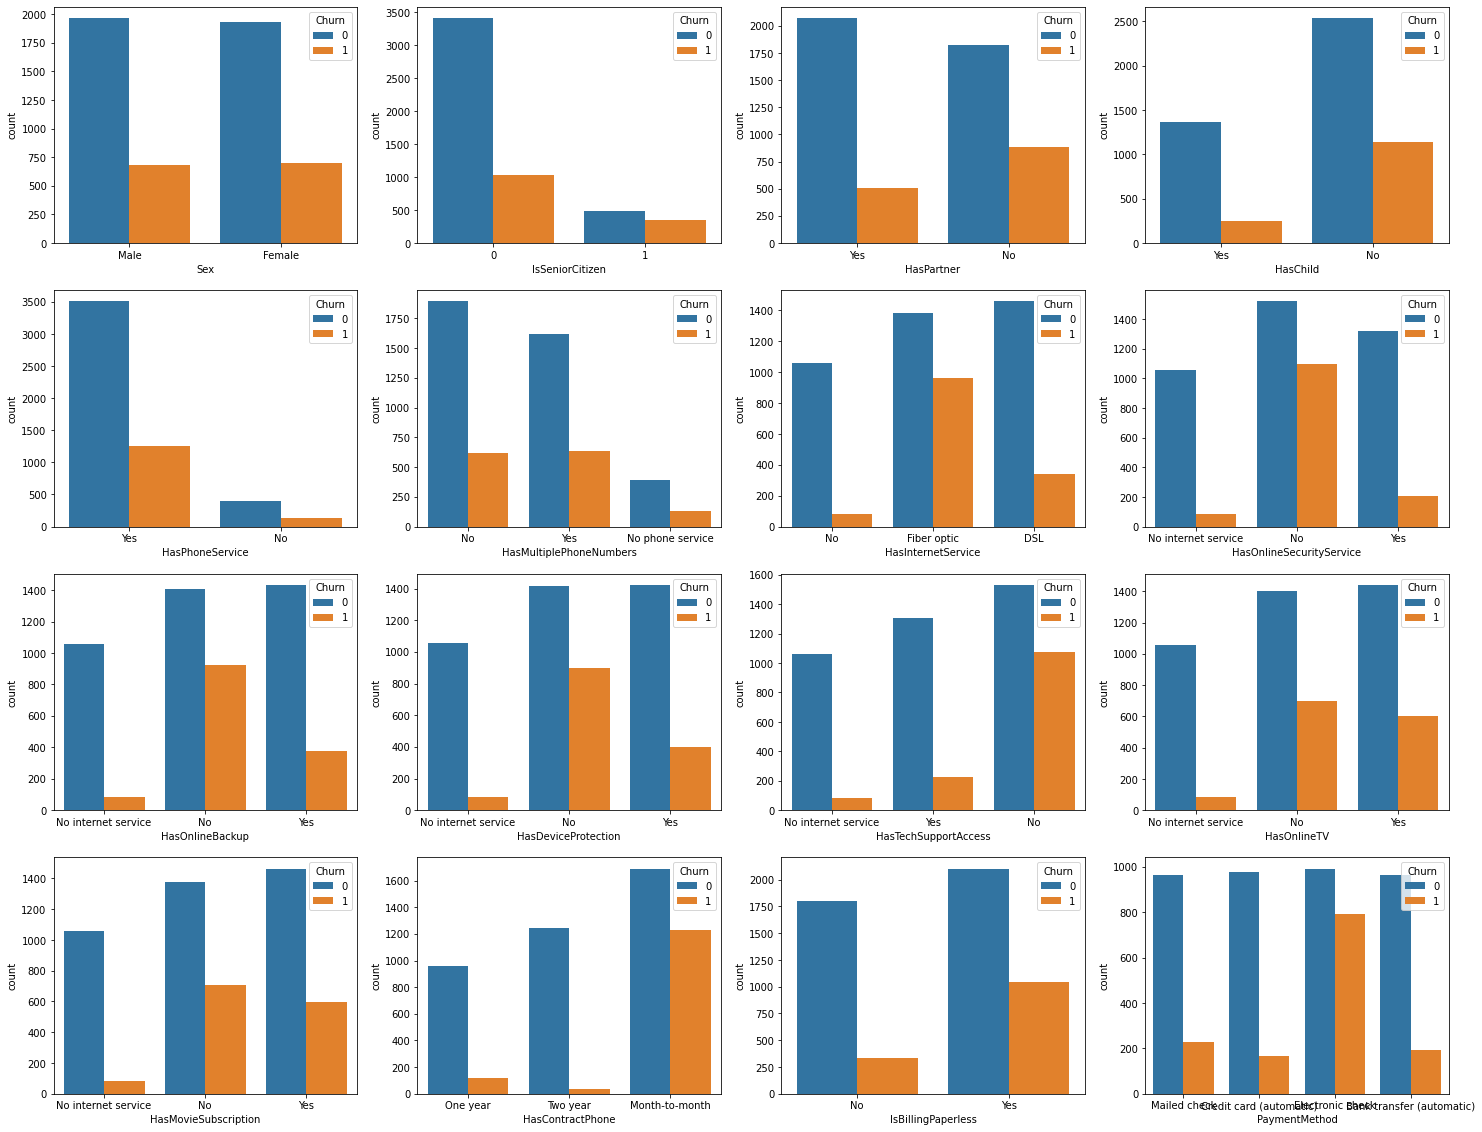

In [8]:
# Посмотрим, как распределены категориальны фичи в контексте таргета.
import seaborn as sns
fig, axarr = plt.subplots(4, 4, figsize=(25, 20))
i=0
j=0
for col in cat_cols:
    sns.countplot(x=col, hue = 'Churn',data = data, ax=axarr[i][j])
    j+=1
    if j == 4:
      i+=1
      j=0

Здесь можно сделать некоторые выводы, например по распределению колонки HasContractPhone можно заметить, что больше всего оттока у краткосрочных клиентов(с помесячным контрактом). 

В PaymentMethod отток высокий у типа электронный чек.

In [9]:
#проверяю численные
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

TotalSpent не численная -  надо разобраться

In [10]:
#функция для перевода в числа

def cleaner(val):
 try:
   val = float(val)
 except:
    val = np.nan
 return val  

data['TotalSpent'] = data['TotalSpent'].apply(cleaner)



In [11]:
#способ быстрее
data['TotalSpent'] = data['TotalSpent'].replace('', np.nan).astype('float64')


In [12]:
data['TotalSpent'].isna().sum()

9

In [13]:
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())         #заполним пропуски медианой

Посмотрим распределение для численных признаков

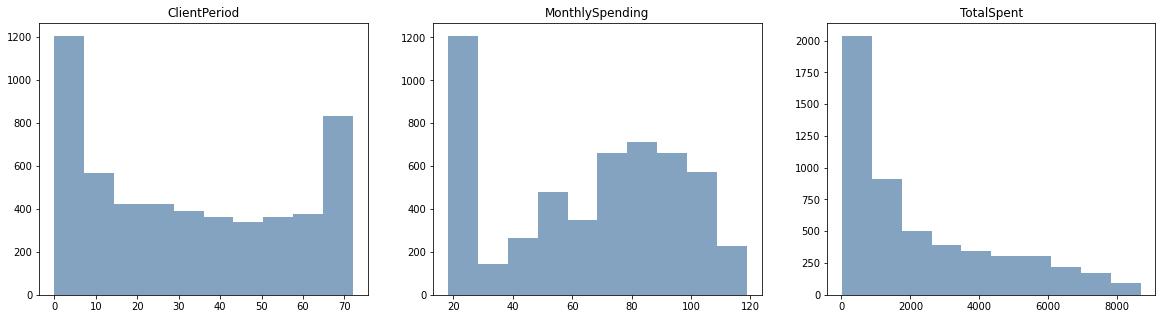

In [ ]:
fig = plt.figure(figsize=(20,5))
for i,col in enumerate(num_cols):
  ax = fig.add_subplot(1,3,i+1)
  ax.set_title(col)
  plt.hist(data[col], color=(0.2, 0.4, 0.6, 0.6))

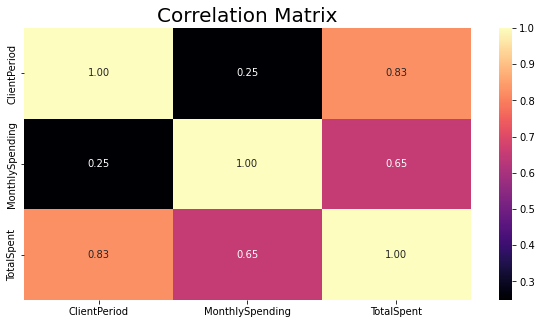

In [ ]:
# Посмотрим, насколько данные признаки скоррелированы
import seaborn as sns
f, ax = plt.subplots(figsize= [10,5])
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2289.889086
std,24.550326,30.176464,2267.371263
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.587500
50%,29.000000,70.400000,1410.250000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
#Проверим, есть ли дубликаты и удалим их
data.duplicated().sum()

14

In [ ]:
#data[data.duplicated()]

In [ ]:
data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Проверка на выбросы
for feature in data[num_cols]:
    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

ClientPeriod no
MonthlySpending no
TotalSpent no


Выбросов нет, проверим еще позже, когда закодируем все фичи

In [ ]:
#посмотрим распределение таргета
data['Churn'].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Классы несбалансированны, нужно будет это учесть при обучении модели

# Обработка категориальных признаков

In [22]:
has_cols = ["HasMultiplePhoneNumbers" ,"HasInternetService","HasOnlineSecurityService","HasOnlineBackup","HasDeviceProtection","HasTechSupportAccess","HasOnlineTV","HasMovieSubscription"] 

In [23]:
cols_for_ohe = [x for x in cat_cols if data[x].nunique() < 3] + has_cols

In [24]:
cols_for_ohe

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription']

In [25]:
cols_for_mte = ['HasInternetService', 'PaymentMethod']

Функция, которая заменяет "No internet service" и "No phone service" в has_cols на "No", затем кодирует чаcть фичей (часть лэйблами 0,1 и  часть через meantarget c добавлением случайного шума)

Отдельно стоит обратить внимание на колонку 'HasContractPhone' . Хоть она и категориальная, но по своей сути целочисленная, ведь означает длительность контракта. Кажется логичным сделать такую замену "Month-to-month": 0,
    "One year": 1,
    "Two year": 2 

In [16]:
def fit_transform(X,y, labelhot, meantarget,has_cols):
      df = pd.concat([X, y], axis =1)
      global dict_of_means 
      dict_of_means = {}

      def mean_f(x):
          return np.sum(x) / x.size + 0.006 * np.random.normal(loc = 0.0, scale = 1.0, size =1)[0]


      df['HasContractPhone'] = df['HasContractPhone'].replace({"Month-to-month": 0, "One year": 1, "Two year": 2 })    

      for col in has_cols:
          df[col] = df[col].replace("No internet service", "No")
          df[col] = df[col].replace("No phone service", "No")


      for col in meantarget:
          mn = df.groupby(col).agg({'Churn': mean_f}).to_dict()['Churn']
          df[col] = df[col].map(mn)

          dict_of_means[col] = mn  

      for col in labelhot:
          df[col] = df[col].replace({"Yes": 1, "No": 0})
          df[col] = df[col].replace({"Male": 1, "Female": 0})

      df[col] = df[col].apply(cleaner)
      df[col] =df[col].fillna(df[col].median())
      #df['TotalSpent'] = df['TotalSpent'].replace('', np.nan).astype('float64').fillna(0)  

      return  df.drop('Churn', axis=1)

In [17]:
def transform(data, labelhot, meantarget,dict_of_means,has_cols):
      df=data.copy()

      df['HasContractPhone'] = df['HasContractPhone'].replace({"Month-to-month": 0, "One year": 1, "Two year": 2 }) 

      for col in has_cols:                                         
          df[col] = df[col].replace("No internet service", "No")
          df[col] = df[col].replace("No phone service", "No")
 
      for col in meantarget:
          df[col] = df[col].map(dict_of_means[col])

      for col in labelhot:
          df[col] = df[col].replace({"Yes": 1, "No": 0})
          df[col] = df[col].replace({"Male": 1, "Female": 0})

      df[col] = df[col].apply(cleaner)
      df[col] =df[col].fillna(df[col].median())
      #df['TotalSpent'] = df['TotalSpent'].replace(' ', np.nan).astype('float64').fillna(0)       

      return  df

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [19]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis = 1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, shuffle = True)

Проверим наши функции

In [26]:
X_train_t = fit_transform(X_train, y_train, cols_for_ohe, cols_for_mte,has_cols)
X_train_t.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
817,25,108.90,2809.05,0,0,0,0,1,1,0.394994,0,1,1,1,1,1.0,2,0,0.422044
3398,67,60.95,4119.40,1,1,1,0,1,0,0.180896,1,1,0,1,0,0.0,1,1,0.186238
5103,64,68.30,4378.80,0,0,1,0,1,0,0.180896,0,1,1,1,0,1.0,2,1,0.205653


In [27]:
X_test_t = transform(X_test, cols_for_ohe, cols_for_mte, dict_of_means, has_cols)
X_test_t.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
4811,1,19.65,19.65,0,0,0,0,1,0,0.072876,0,0,0,0,0,0.0,0,0,0.205653
1165,18,82.00,1425.45,1,0,0,0,1,1,0.180896,0,0,1,1,1,1.0,1,1,0.123287
2906,11,104.05,1133.65,0,1,1,0,1,1,0.394994,0,0,1,1,1,1.0,0,1,0.186238


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', class_weight='balanced', max_iter = 2000)

In [ ]:
pipe_lr = make_pipeline(StandardScaler(), lr)

In [ ]:
pipe_lr.fit(X_train_t, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    penalty='l1', solver='saga'))])

In [ ]:
roc_auc_score(y_test,  pipe_lr.predict_proba(X_test_t)[:,1])

0.8427446072296253

Довольно неплохо, попробуем подобрать другие гиперпараметры через GridSearch

In [ ]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [ ]:
param_grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001], 'logisticregression__penalty' : ['l1', 'l2'],  'logisticregression__class_weight': ['balanced', None], 'logisticregression__random_state': [0, 77,88] }

In [ ]:
#подберем лучшие параметры по сетке
grid = GridSearchCV(pipe_lr, param_grid, scoring = 'roc_auc', verbose=0)

In [ ]:
grid.fit(X_train_t,y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=2000,
                                                           penalty='l1',
                                                           solver='saga'))]),
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__random_state': [0, 77, 88]},
             scoring='roc_auc')

In [ ]:
grid.best_score_   #качество на кросс-валидации

0.8448645918175147

In [ ]:
best = grid.best_params_
best

{'logisticregression__C': 10,
 'logisticregression__class_weight': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 0}

In [ ]:
pipe_lr.set_params(logisticregression__C= 100,
 logisticregression__penalty='l1',
 logisticregression__random_state= 0)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=100, class_weight='balanced',
                                    max_iter=2000, penalty='l1', random_state=0,
                                    solver='saga'))])

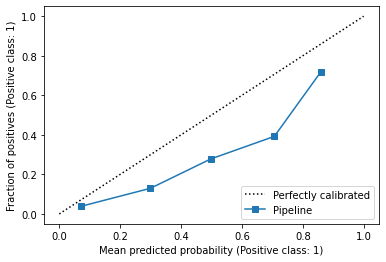

In [ ]:
### Нарисуем калибровочную кривую для нашей модели LR

from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_estimator(pipe_lr, X_test_t, y_test)

In [ ]:
### Калибровка

from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(pipe_lr,
                                           cv=5).fit(X_train_t, y_train)

plats_calibration_preds = calibrated_model.predict_proba(X_test_t)[:, 1]

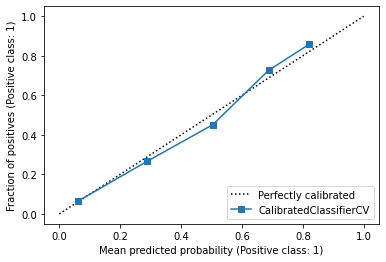

In [ ]:
### Новая кривая
from sklearn.calibration import CalibrationDisplay

CalibrationDisplay.from_estimator(calibrated_model, X_test_t, y_test)

In [ ]:
roc_auc_score(y_test,  plats_calibration_preds)

0.8424452133794695

Калибровка не улучшила качество модели

Выпишите какое лучшее качество и с какими параметрами вам удалось получить


**0.8448920689225146**

{'logisticregression__C': 100,
 'logisticregression__class_weight': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 0}

In [ ]:
feature_list = X_train_t.columns.to_list()

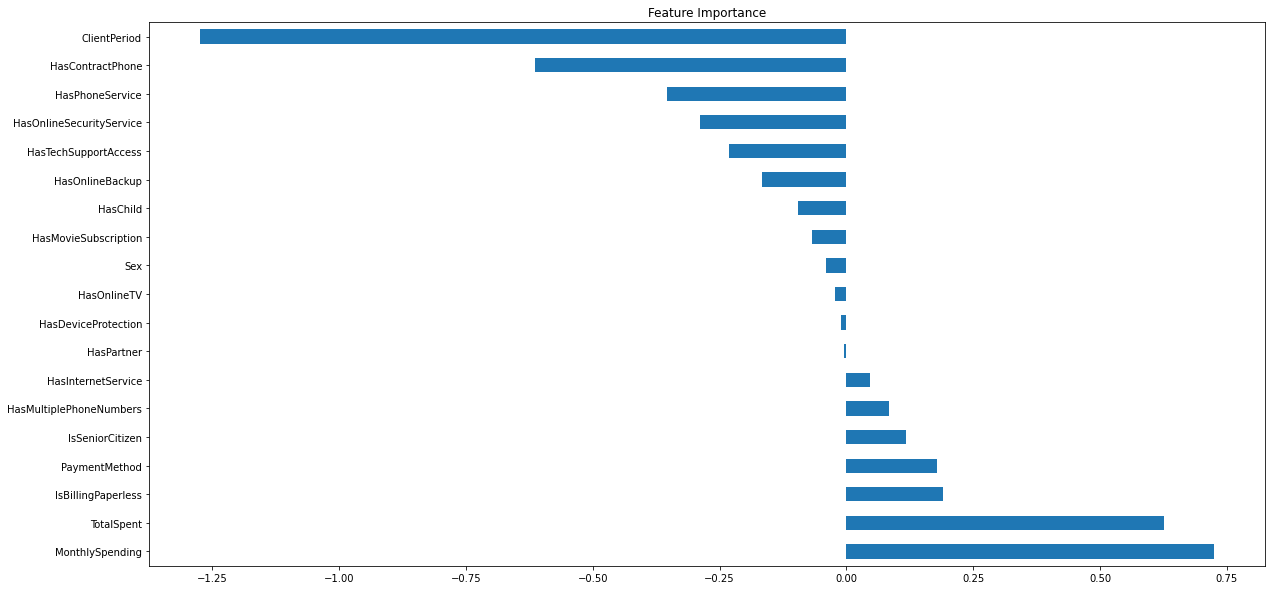

In [ ]:
plt.figure(figsize=(20,10))

importance = pipe_lr[1].coef_[0]

#importance is a list so you can plot it. 
feat_importances = pd.Series(importance,index = feature_list)
ax=feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')


Кажется 'HasPartner' и 'HasDeviceProtection' не сильно важные признаки, возможно позже попробуем без них обучиться, посмотрим, что скажут другие модели

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

In [127]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(verbose = False)
cb.fit(X_train_t,y_train)
roc_auc_score(y_test, cb.predict_proba(X_test_t)[:,1])

0.8444689419108024

Сравним катбуст с теми же параметрами, но на необработанных признаках

In [ ]:
cb = CatBoostClassifier(verbose = False)
cb.fit(X_train,y_train, cat_features=cat_cols)
roc_auc_score(y_test, cb.predict_proba(X_test)[:,1])

0.8566115515475159

**0.857** по дефолту, кажется идея с обработкойне сильно помогла, результат на каггл:

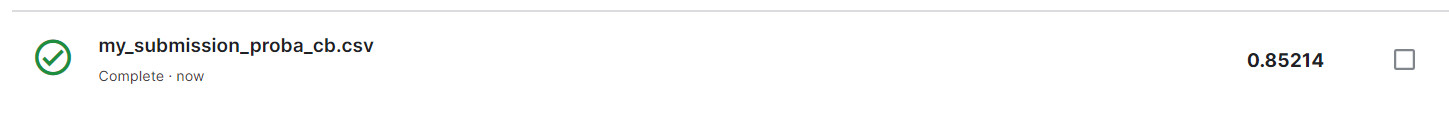

## Попробуем просапсемплить таргет

In [ ]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

    


In [ ]:
features_upsampled, target_upsampled = upsample(X_train_t, y_train, 5)

print(features_upsampled.shape)
print(target_upsampled.shape)

(7511, 19)
(7511,)


In [ ]:
model4 = CatBoostClassifier(verbose = False)
model4.fit(features_upsampled,target_upsampled)
roc_auc_score( y_test, model4.predict_proba(X_test_t)[:,1])

0.8430103633977462

Стало только хуже, но вдруг каггл оценит:

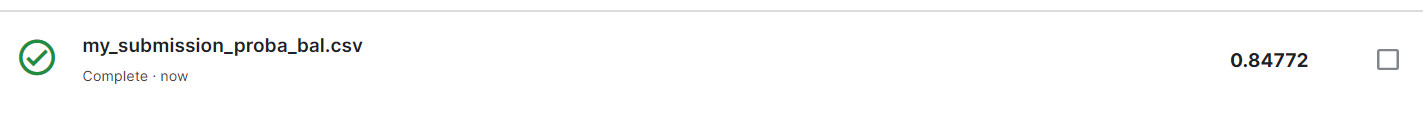

Не оценил(

Попробуем ресемплирование так

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train_t, y_train.ravel())
  

In [ ]:
model3 = CatBoostClassifier(depth= 6, iterations= 200, learning_rate= 0.1,verbose = False)
model3.fit(X_train_res,y_train_res)
roc_auc_score(y_test, model3.predict_proba(X_test_t)[:,1])

0.839726289459285

Получается хуже, оставим затею с балансом классов

Подберем параметры через GridSearchCV

In [ ]:
params =  {
    "n_estimators": [100],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.1],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4],  # np.arange(4, 20, 10),
    "l2_leaf_reg": [5],  #[3, 5, 7, 10]
    "subsample": [0.1],  
    "random_strength": [5],  # [1, 2, 5, 10, 20, 50, 100],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
}

In [ ]:
grid = GridSearchCV(estimator=cb, param_grid = params, scoring = 'roc_auc', cv = 5, n_jobs=-1)
grid.fit(X_train_t,y_train)
grid.best_params_

{'l2_leaf_reg': 5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_data_in_leaf': 100,
 'n_estimators': 100,
 'random_strength': 5,
 'subsample': 0.1}

In [ ]:
grid.best_score_

0.841330564146299

In [ ]:
grid.best_params_

{'l2_leaf_reg': 3,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_data_in_leaf': 100,
 'n_estimators': 100,
 'random_strength': 5,
 'subsample': 0.1}

In [128]:
cb_best = CatBoostClassifier(logging_level='Silent',
    eval_metric="AUC:hints=skip_train~false",
    random_seed=777,
    l2_leaf_reg=5,
    learning_rate=0.1,
    max_depth=4,
    min_data_in_leaf=500,
    n_estimators=100,
    random_strength=5,
    subsample=0.1, )
cb_best.fit(X_train_t,y_train)

In [ ]:
preds = cb_best.predict_proba(X_test_t)[:,1]
roc_auc_score(y_test,preds) 

0.8537191096714031

# Logreg

In [28]:
sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train_t)
X_test_sc = sc.transform(X_test_t)

In [94]:
lr_best = LogisticRegression(C = 100, penalty = 'l1', solver = 'saga', random_state = 0, class_weight='balanced', max_iter = 5000)

In [95]:
lr_best.fit(X_train_sc, y_train)

LogisticRegression(C=100, class_weight='balanced', max_iter=5000, penalty='l1',
                   random_state=0, solver='saga')

In [96]:
roc_auc_score(y_test,  lr_best.predict_proba(X_test_sc)[:,1])

0.845380046310279

# Random Forest

In [97]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_sc, y_train)




RandomForestClassifier()

In [98]:
param_rf = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

In [99]:
grid_rf = GridSearchCV(estimator=rf, param_grid = param_rf, scoring = 'roc_auc', cv = 5, n_jobs=-1)
grid_rf.fit(X_train_t,y_train)
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [100]:
rf_best = RandomForestClassifier(criterion= 'entropy',
 max_depth= 6,
 max_features='sqrt',
 n_estimators= 300)

In [101]:
rf_best.fit(X_train_sc, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=300)

In [102]:
roc_auc_score(y_test,rf_best.predict_proba(X_test_sc)[:,1]) 

0.8478556327393537

Выбралась в серединку лидерборда

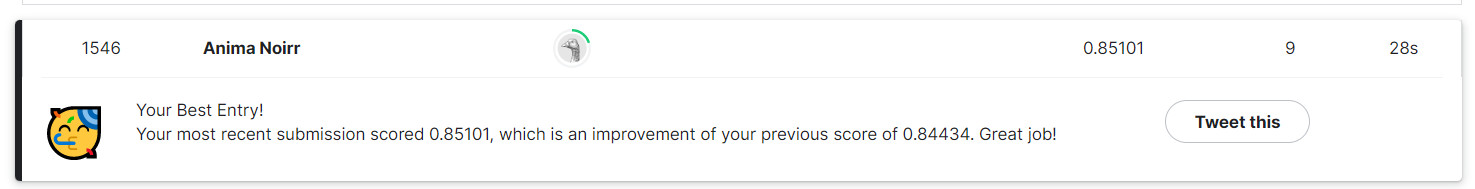

In [114]:
##функция, которая будет строить красивый график с важностью фичей

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary # Создаем отдельный датасет для визуализации
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    

In [103]:
importances = rf_best.feature_importances_

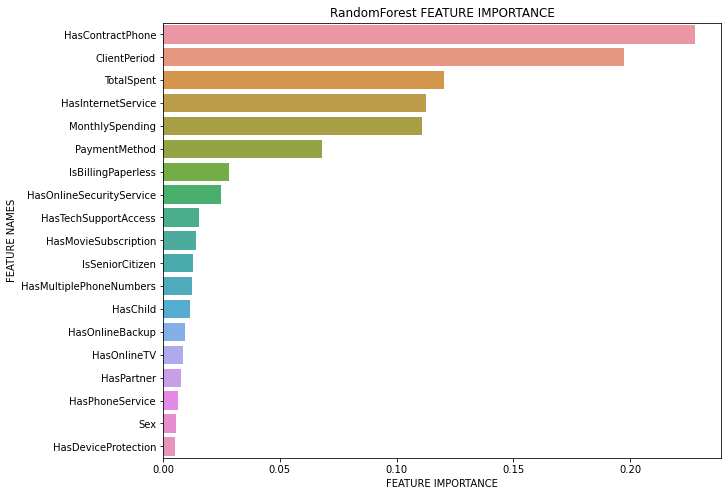

In [115]:
plot_feature_importance(rf_best.feature_importances_,X_train_t.columns,'RandomForest ')

### XGBoost

In [106]:
import xgboost
xb=xgboost.XGBClassifier()
xb.fit(X_train_sc,y_train )
roc_auc_score(y_test, xb.predict_proba(X_test_sc)[:,1])

0.8276532769556025

In [108]:
params={
 "learning_rate"    : [ 0.20] ,  #[ 0.10, 0.20, 0.30 ]
 "max_depth"        : [4], #[ 0.10, 0.20, 0.30 ]
 "min_child_weight" : [1],          #[ 1, 3, 5, 7 ]
 "gamma"            : [0.2],    #[ 0.0,  0.2 , 0.4 ]
    
}
gr_xb=GridSearchCV(xb, params,  scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)
gr_xb.fit(X_train_sc,y_train)
gr_xb.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.8290550385907421

In [109]:
gr_xb.best_params_

{'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1}

In [110]:
xb_best = xgboost.XGBClassifier(colsample_bytree= 0.3,
 gamma= 0.2,
 learning_rate= 0.1,
 max_depth= 4,
 min_child_weight= 1)

In [111]:
xb_best.fit(X_train_sc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [112]:
roc_auc_score(y_test, xb_best.predict_proba(X_test_sc)[:,1])

0.8509251988321755

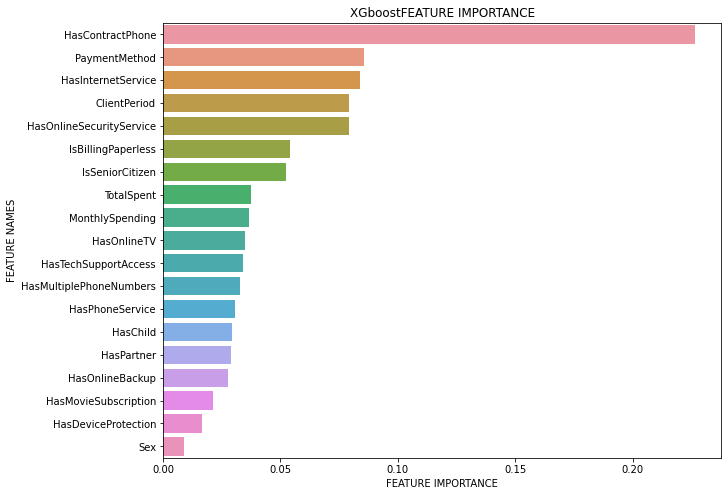

In [116]:
plot_feature_importance(xb_best.feature_importances_,X_train_t.columns,'XGboost')

### KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16,32,64,128], 
    "metric": ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan", "nan_euclidean"],  
    'weights': ['uniform','distance']
}

In [118]:
grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train_sc,y_train)
grid_knn.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


{'metric': 'cityblock', 'n_neighbors': 128, 'weights': 'uniform'}

In [119]:
knn_best = KNeighborsClassifier(metric= 'cityblock', n_neighbors= 64, weights= 'uniform')

In [120]:
knn_best.fit(X_train_sc,y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=64)

In [121]:
roc_auc_score(y_test, knn_best.predict_proba(X_test_sc)[:,1])

0.841228229135206

# Пробую реализовать Стеккинг 

In [129]:
lr=lr_best
rf = rf_best
xgb = xb_best
knn = knn_best
cb = cb_best

In [130]:
models = [lr,rf,xgb,knn,cb]
mod_names = ['LogisticRegression','SVC', 'RandomForestClassifier','XGBClassifier', 'KNeighborsClassifier', 'CatBoostClassifier']

models = list(zip(models,mod_names))

In [143]:
 X_t = fit_transform(X, y, cols_for_ohe, cols_for_mte,has_cols)

In [144]:
X_sc = sc.fit_transform(X_t)

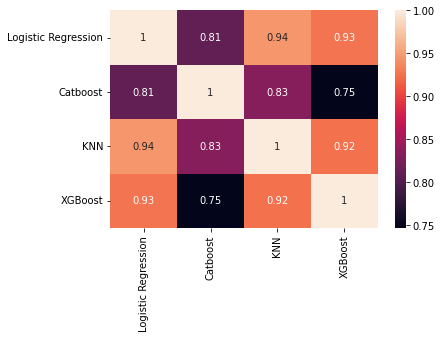

In [145]:
import seaborn as sns
test_lr = pd.Series(lr_best.predict_proba(X_sc)[:,1], name="Logistic Regression")
test_gb = pd.Series(cb_best.predict_proba(X_sc)[:,1], name="Catboost")
test_knn = pd.Series(knn_best.predict_proba(X_sc)[:,1], name="KNN")
test_xb = pd.Series(xb_best.predict_proba(X_sc)[:,1], name="XGBoost")


ensemble_results = pd.concat([test_lr,test_gb,test_knn, test_xb],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

# StackingClassifier

In [132]:
from sklearn.ensemble import StackingClassifier

In [133]:
meta = CatBoostClassifier(
    logging_level='Silent',
    eval_metric="AUC:hints=skip_train~false",
    metric_period=1000,
    random_seed=777,
    l2_leaf_reg=5,
    learning_rate=0.5,
    max_depth=4,
    min_data_in_leaf=10,
    n_estimators=10,
    random_strength=5,
    subsample=0.1,
)
stacking = StackingClassifier(
    estimators=[
        ("lr", lr_best),
        ("knn", knn_best),
        ("rf", rf_best),
        ("cb", cb_best),
    ],
    final_estimator=meta,
    n_jobs=-1,
)


In [134]:
stacking.fit(X_train_sc, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=100,
                                                   class_weight='balanced',
                                                   max_iter=5000, penalty='l1',
                                                   random_state=0,
                                                   solver='saga')),
                               ('knn',
                                KNeighborsClassifier(metric='cityblock',
                                                     n_neighbors=64)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       n_estimators=300)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7fa4d3edcb80>)],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7fa4d3edcd00>,
                   n_jobs=-1)

In [135]:
stacking.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=100,
                                                   class_weight='balanced',
                                                   max_iter=5000, penalty='l1',
                                                   random_state=0,
                                                   solver='saga')),
                               ('knn',
                                KNeighborsClassifier(metric='cityblock',
                                                     n_neighbors=64)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       n_estimators=300)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x7f

In [136]:
roc_auc_score(y_test, stacking.predict_proba(X_test_sc)[:,1])

0.8468468740561763

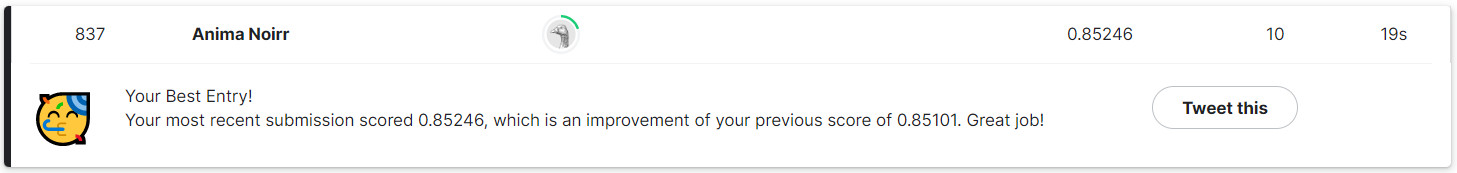

# No Sex!
Проверим, как отразится на качестве избавление от самых неважных признаков по мнению большинства моделей - 'Sex' и  'HasDeviceProtection'

In [ ]:
data2 = data.drop(['Sex'], axis =1)

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [ 'HasDeviceProtection',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
has_cols = ["HasMultiplePhoneNumbers" ,"HasInternetService","HasOnlineSecurityService","HasOnlineBackup","HasTechSupportAccess",'HasDeviceProtection',"HasOnlineTV","HasMovieSubscription"] 

In [ ]:
cols_for_ohe = [x for x in cat_cols if data[x].nunique() < 3] + has_cols

In [ ]:
cols_for_ohe

['IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasTechSupportAccess',
 'HasDeviceProtection',
 'HasOnlineTV',
 'HasMovieSubscription']

In [ ]:
cols_for_mte = ['HasInternetService', 'PaymentMethod']

In [ ]:
from sklearn.model_selection import train_test_split
X = data2.drop('Churn', axis = 1)
y = data2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, shuffle = True)

In [ ]:
X_train_t = fit_transform(X_train, y_train, cols_for_ohe, cols_for_mte,has_cols)
X_train_t.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
3652,4,94.90,360.55,0,0,0,1,0,0.411473,1,1,0,1,0,1.0,0,1,0.203190
4292,1,74.30,74.30,0,0,0,1,0,0.411473,0,0,0,1,0,0.0,0,1,0.203190
4714,43,115.05,4895.10,0,0,0,1,1,0.411473,1,1,1,1,1,1.0,2,0,0.131267


In [ ]:
X_test_t = transform(X_test, cols_for_ohe, cols_for_mte, dict_of_means, has_cols)
X_test_t.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
4904,42,19.35,867.30,0,1,1,1,0,0.075136,0,0,0,0,0,0.0,2,0,0.203190
4978,5,75.90,357.75,0,0,0,1,1,0.411473,0,0,0,0,0,0.0,0,1,0.176431
4723,72,116.40,8543.25,0,1,1,1,1,0.411473,1,1,1,1,1,1.0,2,1,0.131267


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(verbose = False)
cb.fit(X_train,y_train, cat_features=cat_cols)
roc_auc_score(y_test, cb.predict_proba(X_test)[:,1])

0.8588249330431528

Неожиданно. Посмотрим, что скажет каггл

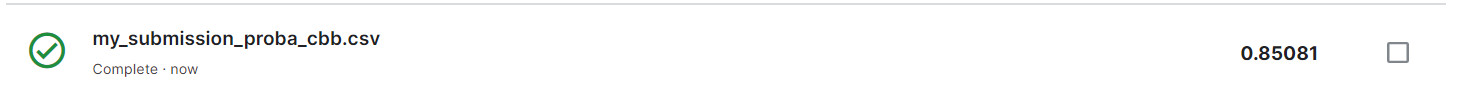

Не оценил ( c 'HasDeviceProtection' тоже)

# PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sc)
X_train_pca = pd.DataFrame(X_train_pca, columns=['PCA_1', 'PCA_2',])
X_train_pca.head()

,PCA_1,PCA_2
0,2.776143,-0.763409
1,1.143539,1.277072
2,1.993359,1.792324
3,0.188831,0.777503
4,1.469400,-0.891011


In [32]:
print(f"Первая и вторая компоненты объясняют {pca.explained_variance_ratio_} долю дисперсии соответственно.")

Первая и вторая компоненты объясняют [0.26315599 0.14936319] долю дисперсии соответственно.


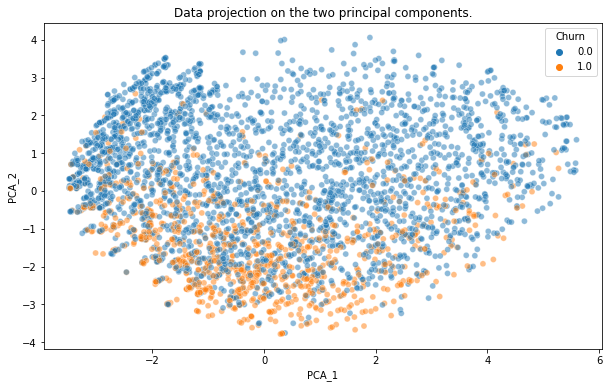

In [41]:
PCA_df = np.concatenate((X_train_pca.values, y_train.values.reshape(-1, 1)), axis=1)
PCA_df = pd.DataFrame(PCA_df, columns=['PCA_1', 'PCA_2', 'Churn'])

plt.figure(figsize=(10, 6))

plt.title("Data projection on the two principal components.")
sns.scatterplot(data=PCA_df, x="PCA_1", y="PCA_2", hue="Churn", alpha= 0.5);

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('pca', PCA(n_components=2)),
                 ('model', LogisticRegression())])

In [86]:
def train_pca_i(n_components, X_train_t, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(solver = 'saga', random_state=32))])
    
    param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
                   'model__C': [ 0.001, 0.01, 0.1, 1, 10, 100]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train_t, y_train)
    
    report = classification_report(y_test, grid.predict(X_test_t), output_dict=True)
    roc_auc = roc_auc_score(y_test, grid.predict_proba(X_test_t)[:,1])
    return ( report['weighted avg']['f1-score'], roc_auc)        #report['accuracy'], report['weighted avg']['f1-score'], 

In [77]:
roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>

In [ ]:
%%time
accuracy_dict, f1_score_dict, roc_auc_dict = {}, {}, {}
components_list = [2, 4, 8, 16,18]

for n_components in components_list:
    f1_score, roc_auc = train_pca_i(n_components, X_train_t, y_train)        #accuracy, 
    #accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1_score
    roc_auc_dict[n_components] = roc_auc

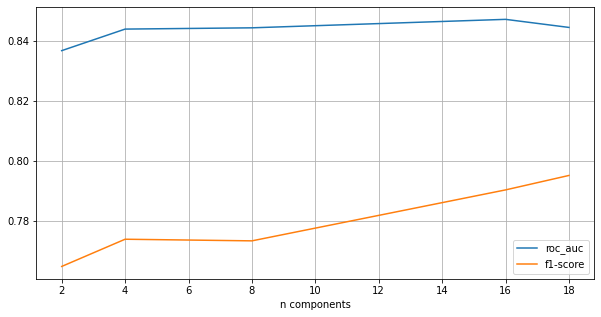

In [88]:
plt.figure(figsize=(10, 5))

plt.plot(components_list,roc_auc_dict.values(), label='roc_auc')
plt.plot(components_list, f1_score_dict.values(), label='f1-score')

plt.xlabel('n components')
plt.legend()
plt.grid();

In [84]:
roc_auc_dict.values()

dict_values([0.836621363132991, 0.8435014597805295, 0.8442182623577973, 0.8470331219168429, 0.8443471257424746])

16 компонент оптимально, но судя по всему не дадут больше скора, чем исходный датасет

In [141]:
def train_pca_m( X_train_t, y_train, model):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=16)),
                     ('model', model)])   

    pipe.fit(X_train_t, y_train)

    roc_auc = roc_auc_score(y_test, pipe.predict_proba(X_test_t)[:,1])
    return roc_auc      

In [137]:
train_pca_m(X_train_t, y_train, stacking)

0.8451847377428773

Не впечатляет

# Предсказания

In [ ]:
best_model = stacking

In [ ]:
best_model.fit(X_sc, y, cat_features=cat_cols)

In [ ]:
X_test_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLS2023/hw_3/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLS2023/hw_3/submission.csv')

In [ ]:
X_test_.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [ ]:
#X_test_['TotalSpent'] = X_test_['TotalSpent'].replace(' ', np.nan).astype('float64')

In [ ]:
#X_test_['TotalSpent'] =X_test_['TotalSpent'].fillna(X_test_['TotalSpent'].median())

In [ ]:
X_test_tt = transform(X_test_, cols_for_ohe, cols_for_mte, dict_of_means, has_cols) 

In [ ]:
X_test_sc = sc.transform(X_test_tt )

In [ ]:
dict_of_means

{'HasInternetService': {'DSL': 0.18823574179583127,
  'Fiber optic': 0.4026177014671536,
  'No': 0.07214256674261617},
 'PaymentMethod': {'Bank transfer (automatic)': 0.15871646618634647,
  'Credit card (automatic)': 0.14067731212974352,
  'Electronic check': 0.43009650438026925,
  'Mailed check': 0.18846156415627324}}

In [ ]:
X_test_.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
submission['Churn'] =best_model.predict_proba(X_test_)[:,1]

submission.to_csv('my_submission_proba_cbb.csv', index =False)

In [ ]:
X_test[num_cols].describe()

In [ ]:
submission

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.